#### 該文件包含1,338個案例，即目前已經登記過的保險計劃受益者、病人特點和計劃計入的總醫療費用特徵:

* age:表示主要受益者年齡
* sex:性別
* bmi:身體質量指數,理想BMI在18.5~24.9之間
* children:表示保險計劃中所包括的孩子/受撫養者的數量
* smoker:表示被保險人是否經常吸煙
* region:受益者在美國的居住地-東北(northeast), 東南(sotheast), 西南(southwest)和東北(northwest)
* charges:醫療費用

#### 目的:檢測與醫療費用相關之變量，找出在醫療費用上具高風險的人

In [25]:
import pandas as pd
import numpy as np

In [26]:
insurance_data = pd.read_csv('insurance.csv')

In [27]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
# Applying one-hot encoding to the categorical variables 'sex', 'smoker', and 'region'
encoded_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])

# Display the first few rows of the newly encoded dataframe
encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Select specific numerical columns to be scaled (excluding 'children' and 'charges')
features_to_scale = insurance_data[['age', 'bmi']]

# Fit and transform the selected features
scaled_features = min_max_scaler.fit_transform(features_to_scale)

# Create a DataFrame for the scaled data
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Combine the scaled features with the unchanged 'children' and 'charges', and the one-hot encoded features
final_adjusted_data = pd.concat([
    scaled_features_df,
    insurance_data[['children', 'charges']],
    encoded_data[['sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
], axis=1)

# Display the first few rows of the adjusted dataset
final_adjusted_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0,16884.92400,True,False,False,True,False,False,False,True
1,0.000000,0.479150,1,1725.55230,False,True,True,False,False,False,True,False
2,0.217391,0.458434,3,4449.46200,False,True,True,False,False,False,True,False
3,0.326087,0.181464,0,21984.47061,False,True,True,False,False,True,False,False
4,0.304348,0.347592,0,3866.85520,False,True,True,False,False,True,False,False


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the feature and target arrays
X = final_adjusted_data.drop('charges', axis=1)
y = final_adjusted_data['charges']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polynomial features transformation with degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions and model evaluation
y_pred = model.predict(X_test_poly)
mse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

# Predictions and model evaluation
y_pred_train = model.predict(X_train_poly)
mse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print('R2_score (train): ', r2_train)
print('R2_score (test): ', r2_test)
print("RMSE(train): ", mse_train)
print("RMSE(test): ", mse_test)


R2_score (train):  0.8373709632701476
R2_score (test):  0.8802620539610427
RMSE(train):  4828.612527580189
RMSE(test):  4365.076728043619


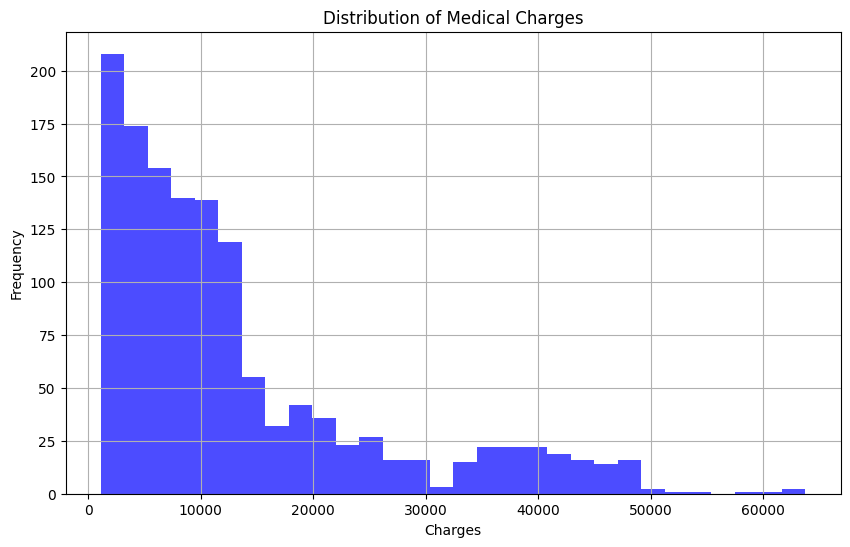

In [32]:
import matplotlib.pyplot as plt

# Plotting the distribution of the 'charges' column
plt.figure(figsize=(10, 6))
plt.hist(insurance_data['charges'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
# Applying the logarithmic transformation to the 'charges'
y_log = np.log(y)

# Splitting the data into training and testing sets for the transformed target
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=0)

# Transforming features to polynomial degree 2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the Linear Regression model to the transformed target
model.fit(X_train_poly, y_train_log)

# Predicting using the polynomial features
y_pred_log_test = model.predict(X_test_poly)

# Calculating MSE and R² for the transformed target
mse_log_test = mean_squared_error(y_test_log, y_pred_log_test)
r2_log_test = r2_score(y_test_log, y_pred_log_test)

# Predicting using the polynomial features
y_pred_log_train = model.predict(X_train_poly)

# Calculating MSE and R² for the transformed target
mse_log_train = mean_squared_error(y_train_log, y_pred_log_train)
r2_log_train = r2_score(y_train_log, y_pred_log_train)

# Convert predictions back to original scale for interpretation
y_pred_original = np.exp(y_pred_log_test)

print('R2_score (train): ', r2_log_train)
print('R2_score (test): ', r2_log_test)
print("RMSE(train): ", mse_log_train)
print("RMSE(test): ", mse_log_test)


R2_score (train):  0.8370082087802277
R2_score (test):  0.861483089307072
RMSE(train):  0.13791030372492763
RMSE(test):  0.116322197611855


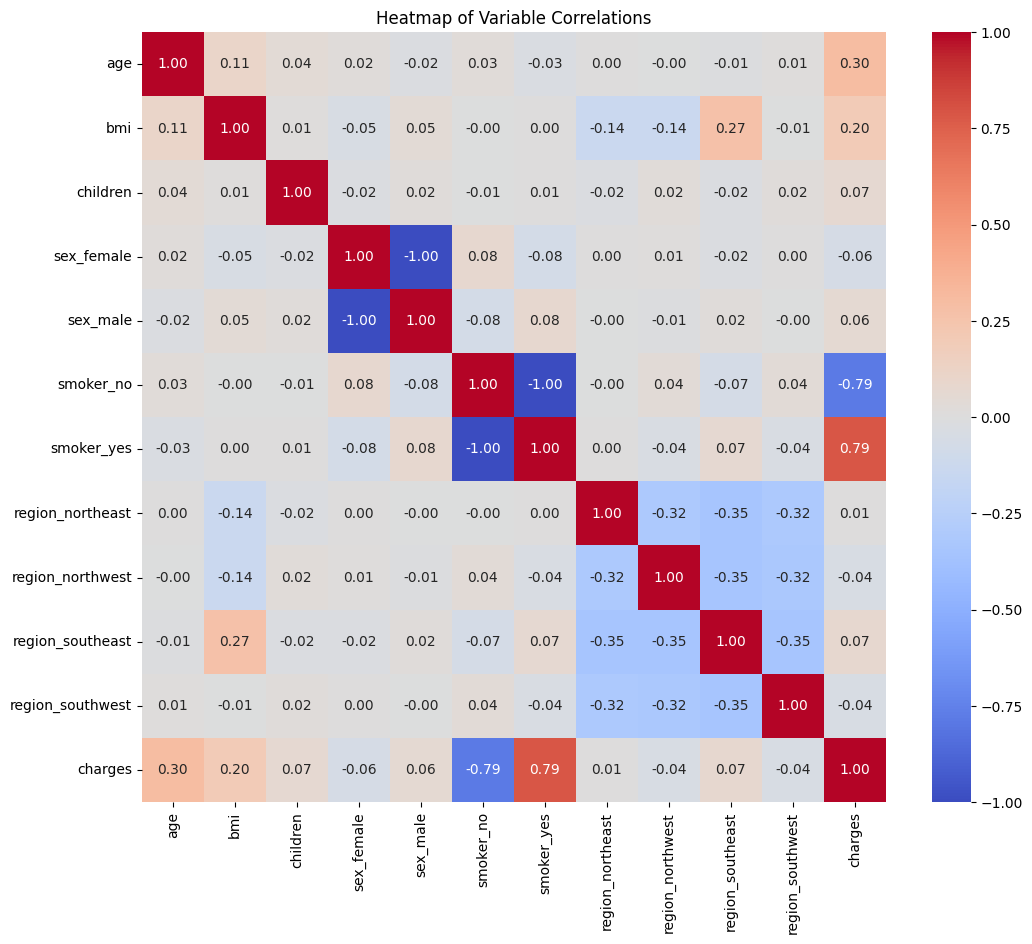

In [34]:
import seaborn as sns

# Combine all features and the original 'charges' for correlation analysis
data_for_correlation = pd.concat([X, y], axis=1)

# Compute the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Variable Correlations')
plt.show()


In [35]:
# Selecting a reduced set of features based on the heatmap and user preference
reduced_features = final_adjusted_data[['age', 'bmi', 'smoker_yes']]

# Splitting the data into training and testing sets for the reduced feature set
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(reduced_features, y, test_size=0.2, random_state=0)

# Transforming features to polynomial degree 2 for the reduced feature set
X_train_poly_reduced = poly.fit_transform(X_train_reduced)
X_test_poly_reduced = poly.transform(X_test_reduced)

# Fitting the Linear Regression model to the reduced feature set
model.fit(X_train_poly_reduced, y_train)

# Predicting using the polynomial features for the reduced feature set
y_pred_reduced_test = model.predict(X_test_poly_reduced)

# Calculating MSE and R² for the reduced feature set
mse_reduced_test = np.sqrt(mean_squared_error(y_test, y_pred_reduced_test))
r2_reduced_test = r2_score(y_test, y_pred_reduced_test)

# Predicting using the polynomial features for the reduced feature set
y_pred_reduced_train = model.predict(X_train_poly_reduced)

# Calculating MSE and R² for the reduced feature set
mse_reduced_train = np.sqrt(mean_squared_error(y_train, y_pred_reduced_train))
r2_reduced_train = r2_score(y_train, y_pred_reduced_train)

print('R2_score (train): ', r2_reduced_train)
print('R2_score (test): ', r2_reduced_test)
print("RMSE(train): ", mse_reduced_train)
print("RMSE(test): ", mse_reduced_test)

R2_score (train):  0.8279854882220679
R2_score (test):  0.8773278585856427
RMSE(train):  4965.9901700420905
RMSE(test):  4418.236440169443
